In [952]:
import pandas as pd
import numpy as np

# Load the data

x_train = pd.read_csv('Dataset/x_train_all.csv')  
y_train = pd.read_csv('Dataset/y_train_all.csv')

summary_stats = x_train.describe()
summary_stats

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


<div style="text-align: center;">

## Initial Silhouette Scores:

#### 10 clusters - 0.14337657005172605
#### 8 clusters - 0.15572181678470226
#### 6 clusters - 0.20639571486279004
#### 4 clusters - 0.3119771748068869
#### 2 clusters - 0.3568434794605163

In [953]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, accuracy_score

# K-Means Clustering Function set with the a random_state of 19 and n_init of 10 to ensure consistency.

def kmeansfunc(data, k, inertia=True):
    kmeans = KMeans(n_clusters=k, random_state=19, n_init=10)
    clusters = kmeans.fit_predict(data)
    clusters = pd.DataFrame(clusters)

    # Inertia, otherwise known as within-cluster sum of squares. It quantifies the total spread or variance 
    # within the clusters created by the k-means algorithm.
    
    if inertia == True:
        print("Inertia: ", kmeans.inertia_)

    return clusters

# Function to commpute the silhouette score. It assesses the quality of clusters produced by our clustering algorithm.
# The higher the score, the better the clustering.

def silhouetteScore(data, clustersdata):
    silhouette_avg = silhouette_score(data, clustersdata)
    print("Silhouette Score:", silhouette_avg)
    return silhouette_avg

# Function to compute the Davies-Bouldin score. It assesses the quality of clustering by considering both the average similarity
# between clusters and the dissimilarity between the clusters. The lower the score, the better the clustering.

def db_score(data, clustersdata):
    davies_bouldin = davies_bouldin_score(data, clustersdata)
    print("Davies-Bouldin Score:", davies_bouldin)
    return davies_bouldin

# Function to compute the Calinski-Harabasz score. It assesses the quality of clustering by measuring the ratio between the 
# within-cluster dispersion and the between-cluster dispersion. The higher the score, the better the clustering.

def calinski_score(data, clustersdata):
    calinski_harabasz = calinski_harabasz_score(data, clustersdata)
    print("Calinski-Harabasz Score:", calinski_harabasz)
    return calinski_harabasz

# Function to compute the accuracy of the clustering algorithm. It assesses the quality of clustering by comparing the cluster values
# to the actual ground truth values from y_train. The higher the score, the better the clustering.

def accuracy_metric(testing_df, y_train, cluster_labels):
    data = []
    labels = []

    # Convert y_train to numpy array if it is a dataframe.

    if type(y_train) == pd.DataFrame:
        y_train_array = y_train.to_numpy()

    # Iterating through each cluster

    for cluster_label in np.unique(cluster_labels):
        
        # Getting the data points that belong to the current cluster by creating a boolean mask and 
        # applying it to our dataframe.

        cluster_mask = (cluster_labels == cluster_label)
        X_cluster = testing_df[cluster_mask]

        # Retrieving the corresponding ground truth labels from y_train.

        y_cluster = y_train_array[cluster_mask].flatten()

        # Appending the data points and labels to lists.

        data.append(X_cluster)
        labels.append(y_cluster)
    
    # Concatenating the lists into numpy arrays.

    data = np.concatenate(data, axis=0)
    labels = np.concatenate(labels)

    # Computing the accuracy score using the accuracy_score function from sklearn.
    
    accuracy = accuracy_score(y_train, labels)
    print("Accuracy:", accuracy)
    return accuracy

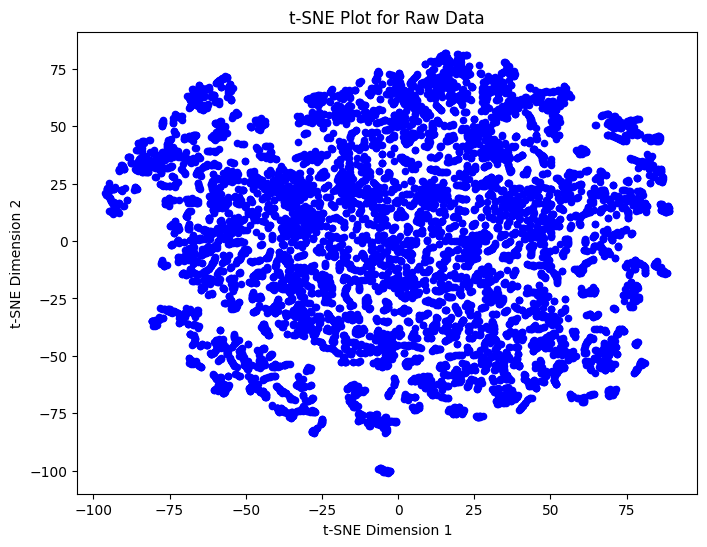

In [954]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

raw_data = x_train.to_numpy()

# t-SNE Plot for Raw Data

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(raw_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Raw Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [955]:
# 2 clusters on the Raw Data

clusters_raw2 = kmeansfunc(raw_data, 2)
clusters_raw2 = clusters_raw2.to_numpy().ravel()
db_score(raw_data, clusters_raw2)
calinski_score(raw_data, clusters_raw2)
accuracy_metric(raw_data, y_train, clusters_raw2)
silhouetteScore(raw_data,clusters_raw2)

Inertia:  65497786443.08869
Davies-Bouldin Score: 1.3051138364604997
Calinski-Harabasz Score: 5148.986891793889
Accuracy: 0.10278637770897833
Silhouette Score: 0.3568434794605163


0.3568434794605163

In [956]:
# 4 clusters on the Raw Data

clusters_raw4 = kmeansfunc(raw_data, 4)
clusters_raw4 = clusters_raw4.to_numpy().ravel()
db_score(raw_data, clusters_raw4)
calinski_score(raw_data, clusters_raw4)
accuracy_metric(raw_data, y_train, clusters_raw4)
silhouetteScore(raw_data,clusters_raw4)

Inertia:  49316167920.451126
Davies-Bouldin Score: 1.6143965996818797
Calinski-Harabasz Score: 3338.410099772859
Accuracy: 0.21238390092879256
Silhouette Score: 0.3119771748068869


0.3119771748068869

In [957]:
# 6 clusters on the Raw Data

clusters_raw6 = kmeansfunc(raw_data, 6)
clusters_raw6 = clusters_raw6.to_numpy().ravel()
db_score(raw_data, clusters_raw6)
calinski_score(raw_data, clusters_raw6)
accuracy_metric(raw_data, y_train, clusters_raw6)
silhouetteScore(raw_data,clusters_raw6)

Inertia:  42723769606.66766
Davies-Bouldin Score: 1.7383688447218548
Calinski-Harabasz Score: 2610.498018909493
Accuracy: 0.3016511867905057
Silhouette Score: 0.20639571486279004


0.20639571486279004

In [958]:
# 8 clusters on the Raw Data

clusters_raw8 = kmeansfunc(raw_data, 8)
clusters_raw8 = clusters_raw8.to_numpy().ravel()
db_score(raw_data, clusters_raw8)
calinski_score(raw_data, clusters_raw8)
accuracy_metric(raw_data, y_train, clusters_raw8)
silhouetteScore(raw_data,clusters_raw8)

Inertia:  39315928092.10597
Davies-Bouldin Score: 1.827772212142516
Calinski-Harabasz Score: 2145.735692943448
Accuracy: 0.11960784313725491
Silhouette Score: 0.15572181678470226


0.15572181678470226

In [959]:
# 10 clusters on the Raw Data

clusters_raw10 = kmeansfunc(raw_data, 10)
clusters_raw10 = clusters_raw10.to_numpy().ravel()
db_score(raw_data, clusters_raw10)
calinski_score(raw_data, clusters_raw10)
accuracy_metric(raw_data, y_train, clusters_raw10)
silhouetteScore(raw_data,clusters_raw10)

Inertia:  37364768966.3394
Davies-Bouldin Score: 1.8546934033798876
Calinski-Harabasz Score: 1811.8564129653143
Accuracy: 0.12683178534571724
Silhouette Score: 0.14337657005172605


0.14337657005172605

In [960]:
silhouette_scores = []
inertia = []
cluster_range = range(2, 16)

# Looping through the cluster range to compute the inertia and silhouette scores for each k value.

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=19, n_init=10)
    graph_clusters = kmeans.fit_predict(x_train)
    graph_clusters = graph_clusters.ravel()
    inertia.append(kmeans.inertia_)
    score = silhouetteScore(x_train, graph_clusters)
    silhouette_scores.append(score)

Silhouette Score: 0.3568434794605163
Silhouette Score: 0.31787386895790926
Silhouette Score: 0.3119771748068869
Silhouette Score: 0.2138514956492619
Silhouette Score: 0.20639571486279004
Silhouette Score: 0.20870216130087987
Silhouette Score: 0.15572181678470226
Silhouette Score: 0.1420112913785431
Silhouette Score: 0.14337657005172605
Silhouette Score: 0.1364338850163759
Silhouette Score: 0.1359093551086233
Silhouette Score: 0.13748274838828584
Silhouette Score: 0.13491903897182722
Silhouette Score: 0.1353529757412136


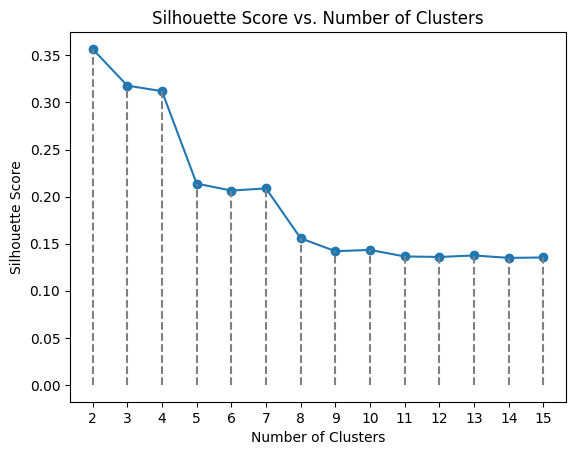

In [961]:
# Plotting the silhouette scores against the number of clusters.

plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xticks(cluster_range)

for i in cluster_range:
    index = i - 2
    plt.plot([cluster_range[index], cluster_range[index]], [0, silhouette_scores[index]], linestyle='--', color='gray')


plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [962]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Pre-processing from part 1

p_df = pd.read_csv('processed_df2.csv')
p_df.shape

(9690, 2304)

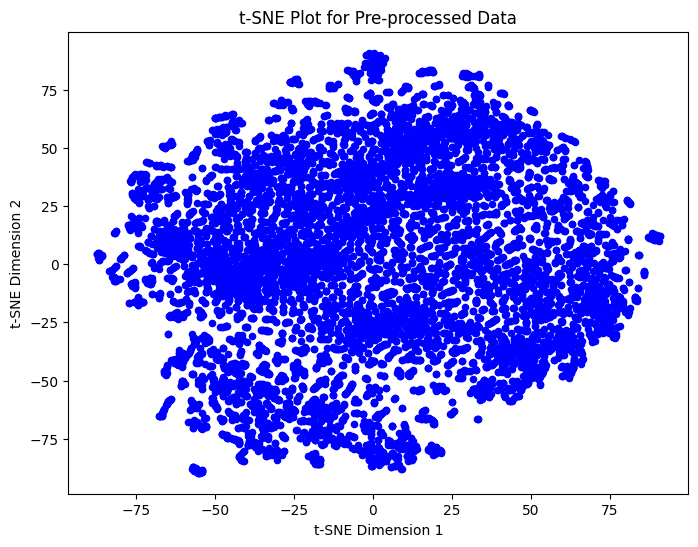

In [963]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

preprocessed_data = p_df.to_numpy()

# t-SNE Plot for Pre-processed Data

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

preprocessed_embedded = tsne.fit_transform(preprocessed_data)

plt.figure(figsize=(8, 6))
plt.scatter(preprocessed_embedded[:, 0], preprocessed_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Pre-processed Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [964]:
# Grayscale to pseudo-infrared conversion function.

def grayscale_to_infrared(grayscale_image):
    # Convert the input grayscale image to a NumPy array with a data type of uint8.
    row = np.array(grayscale_image, dtype=np.uint8)

    # Define a color map for mapping grayscale values to a color representation.
    color_map = plt.get_cmap('hot')

    # Normalize the grayscale image to the range [0, 1].
    normalized_image = row / 255.0

    # Apply the color map to the normalized image and extract the red channel (infrared representation).
    infrared_image = (color_map(normalized_image)[:, :, 0] * 255).astype(np.uint8)

    # Flatten the resulting infrared image to obtain a 1D array.
    return infrared_image.flatten()

In [965]:
infrared_original = []

# Loop through the indices and values in the 'x_train' DataFrame.
for i, idx in enumerate(x_train.index):
    # Extract the grayscale image from the DataFrame and reshape it to 48x48 dimensions.
    original_image = x_train.iloc[idx].values.reshape(48, 48)

    # Convert the grayscale image to an infrared-like representation using the 'grayscale_to_infrared' function.
    infrared_image = grayscale_to_infrared(original_image)

    # Append the resulting infrared image to the 'infrared_original' list.
    infrared_original.append(infrared_image)

# Create a DataFrame 'infrared_df_org' from the list of infrared images.
infrared_df_org = pd.DataFrame(infrared_original)

# Get the shape of the resulting DataFrame to see the dimensions.
infrared_df_org.shape

(9690, 2304)

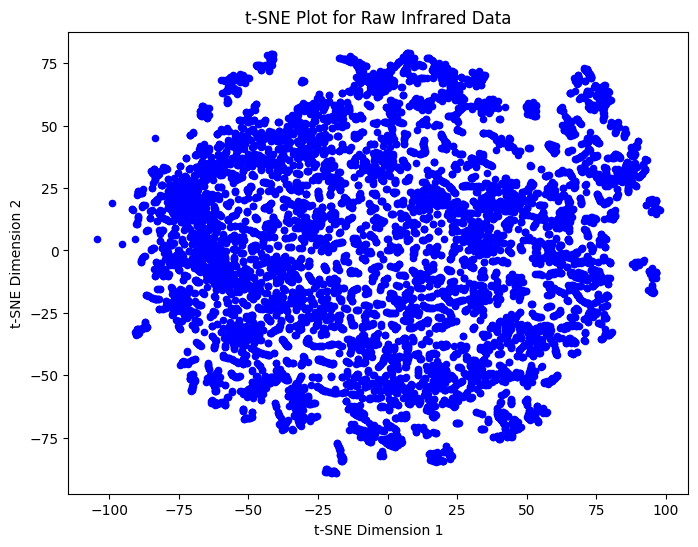

In [966]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = infrared_df_org.to_numpy()

# t-SNE Plot for the Raw data converted to Pseudo-Infrared

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Raw Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


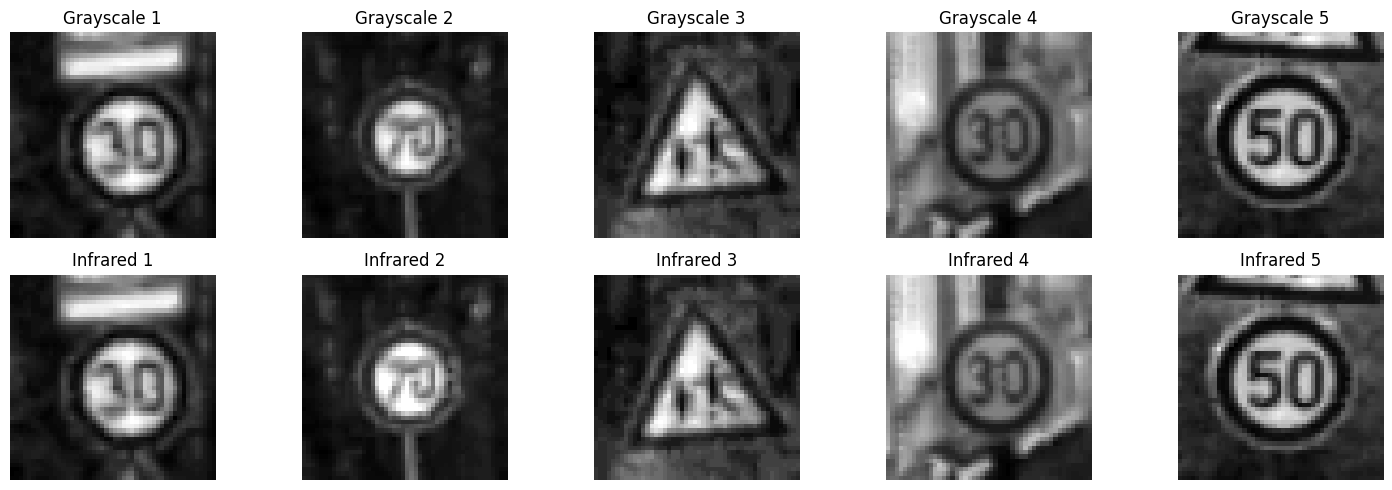

In [967]:
# Visualizing the Grayscale and Infrared Images

sample_size = 5
sample_indices = np.random.choice(range(len(infrared_df_org)), sample_size, replace=False)

x_train_reset = infrared_df_org.reset_index(drop=True)

plt.figure(figsize=(15, 5))

for i, idx in enumerate(sample_indices):
    original_image = x_train.iloc[idx].values.reshape(48, 48)
    processed_image = x_train_reset.iloc[idx].values.reshape(48, 48)

    plt.subplot(2, sample_size, i + 1)
    plt.imshow(original_image, cmap='gray')
    plt.title(f'Grayscale {i+1}')
    plt.axis('off')

    plt.subplot(2, sample_size, sample_size + i + 1)
    plt.imshow(processed_image, cmap='gray')
    plt.title(f'Infrared {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [968]:
# 10 clusters on the raw Infrared Data

clusters = kmeansfunc(infrared_df_org, 10)
clusters = clusters.to_numpy().ravel()
db_score(infrared_df_org, clusters)
calinski_score(infrared_df_org, clusters)
accuracy_metric(infrared_df_org, y_train, clusters)
silhouetteScore(infrared_df_org,clusters)

Inertia:  42586399938.51187
Davies-Bouldin Score: 2.039513157390206
Calinski-Harabasz Score: 2074.2512632638036
Accuracy: 0.20629514963880288
Silhouette Score: 0.13481848683347666


0.13481848683347666

In [969]:
from sklearn.ensemble import IsolationForest

# Outlier Mining using Isolation Forest

feature_names = [f'feature_{str(col)}' for col in x_train.columns]
infrared_copy = x_train.copy()
infrared_copy.columns = feature_names

contamination = 0.01
iso_forest = IsolationForest(contamination=contamination, random_state=42)

outliers = iso_forest.fit_predict(infrared_copy)

outlier_indices = infrared_copy.index[outliers == -1]

infra_no_outliers = infrared_copy.drop(outlier_indices)
y_train_outliers = y_train.copy()
y_train = y_train.drop(outlier_indices)

In [970]:
# 10 clusters on the Infrared Data without outliers

clusters = kmeansfunc(infra_no_outliers, 10)
clusters = clusters.to_numpy().ravel()
db_score(infra_no_outliers, clusters)
calinski_score(infra_no_outliers, clusters)
accuracy_metric(infra_no_outliers, y_train, clusters)
silhouetteScore(infra_no_outliers,clusters)

Inertia:  36507130738.34281
Davies-Bouldin Score: 1.872209273196369
Calinski-Harabasz Score: 1738.022396950417
Accuracy: 0.1807568018346711
Silhouette Score: 0.14197652594783366


0.14197652594783366

In [971]:
# Normalizing the Infrared Data without outliers

mean=infra_no_outliers.mean()
std=infra_no_outliers.std()
infra_norm=(infra_no_outliers-mean)/std

In [972]:
# 10 clusters on the Normalized Infrared Data without outliers

clusters = kmeansfunc(infra_norm, 10)
clusters = clusters.to_numpy().ravel()
db_score(infra_norm, clusters)
calinski_score(infra_norm, clusters)
accuracy_metric(infra_norm, y_train, clusters)
silhouetteScore(infra_norm,clusters)

Inertia:  8628579.582745984
Davies-Bouldin Score: 2.028669552154143
Calinski-Harabasz Score: 1662.3865938708923
Accuracy: 0.1764828520796414
Silhouette Score: 0.1368738510055143


0.1368738510055143

In [973]:
# Normalizing x_train

mean=x_train.mean()
std=x_train.std()
x_norm=(x_train-mean)/std

In [974]:
# Converting every image from the normalized x_train to pseduo-infrared images.

infrared_original = []

for i, idx in enumerate(x_norm.index):
    original_image = x_norm.iloc[idx].values.reshape(48, 48)
    infrared_image = grayscale_to_infrared(original_image)
    infrared_original.append(infrared_image)

infrared_df_norm = pd.DataFrame(infrared_original)
infrared_df_norm.shape

(9690, 2304)

In [975]:
# 10 clusters on the Normalized Infrared Data

clusters = kmeansfunc(infrared_df_norm, 10)
clusters = clusters.to_numpy().ravel()
db_score(infrared_df_norm, clusters)
calinski_score(infrared_df_norm, clusters)
accuracy_metric(infrared_df_norm, y_train_outliers, clusters)
silhouetteScore(infrared_df_norm, clusters)

Inertia:  28916431035.709877
Davies-Bouldin Score: 2.4929967816354783
Calinski-Harabasz Score: 1577.8280725389689
Accuracy: 0.48111455108359136
Silhouette Score: 0.5046952615364717


0.5046952615364717

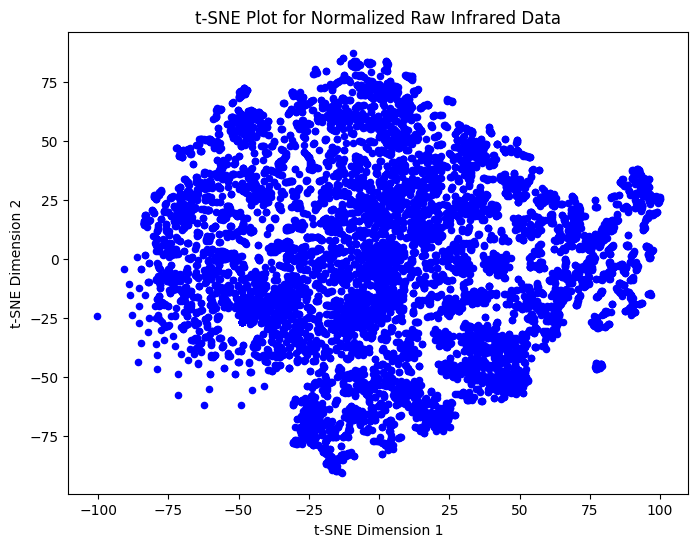

In [976]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = infrared_df_norm.to_numpy()

# t-SNE Plot for the Normalized Raw Infrared Data

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Normalized Raw Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [977]:
from sklearn.ensemble import IsolationForest

# Outlier Mining using Isolation Forest on the Normalized Infrared Data

feature_names = [f'feature_{str(col)}' for col in infrared_df_norm.columns]
infrared_copy = infrared_df_norm.copy()
infrared_copy.columns = feature_names

contamination = 0.01
iso_forest = IsolationForest(contamination=contamination, random_state=42)

outliers = iso_forest.fit_predict(infrared_copy)

outlier_indices = infrared_copy.index[outliers == -1]

infra_norm_no_outliers = infrared_copy.drop(outlier_indices)

In [978]:
# 10 clusters on the Normalized Infrared Data without outliers

clusters = kmeansfunc(infra_norm_no_outliers, 10)
clusters = clusters.to_numpy().ravel()
db_score(infra_no_outliers, clusters)
calinski_score(infra_no_outliers, clusters)
accuracy_metric(infra_norm_no_outliers, y_train, clusters)
silhouetteScore(infra_norm_no_outliers, clusters)

Inertia:  27467387926.813747
Davies-Bouldin Score: 9.504043167685627
Calinski-Harabasz Score: 82.31682699456356
Accuracy: 0.4703429584071719
Silhouette Score: 0.5016481867119463


0.5016481867119463

In [979]:
from sklearn.cluster import KMeans

# Computing another elbow plot to see if the optimal number of clusters changes.

wcss = [] 
for i in range(1, 16): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 19)
    kmeans.fit(infra_norm_no_outliers) 
    wcss.append(kmeans.inertia_)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

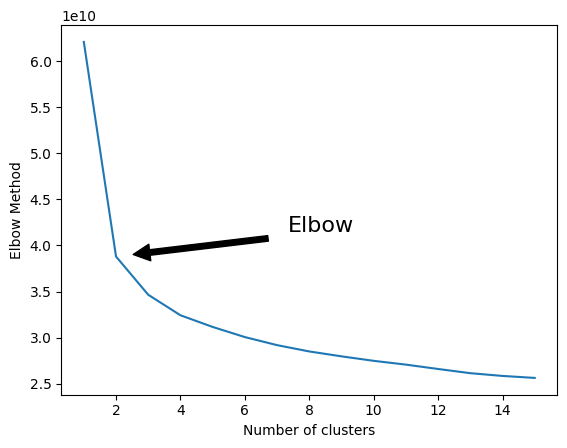

In [980]:
plt.plot(range(1, 16), wcss)
plt.xlabel('Number of clusters')
plt.annotate('Elbow',
             xy=(2, wcss[1]),
             xytext=(0.45, 0.45),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.ylabel('Elbow Method') 
plt.show()

In [981]:
# 2 clusters on the Normalized Infrared Data without outliers

clusters = kmeansfunc(infra_norm_no_outliers, 2)
clusters = clusters.to_numpy().ravel()
db_score(infra_no_outliers, clusters)
calinski_score(infra_no_outliers, clusters)
accuracy_metric(infra_norm_no_outliers, y_train, clusters)
silhouetteScore(infra_norm_no_outliers,clusters)

Inertia:  38799395156.324585
Davies-Bouldin Score: 2.5573218315157584
Calinski-Harabasz Score: 436.12818632460574
Accuracy: 0.5120400291879496
Silhouette Score: 0.6776758908035815


0.6776758908035815

In [982]:
# Function to apply Gaussian blur to an input image
def apply_gaussian_blur(row, kernel_size=(5, 5), sigma=0):
    # Convert the input image to a NumPy array with a data type of uint8.
    row = np.array(row, dtype=np.uint8)

    # Apply Gaussian blur to the image with the specified kernel size and sigma.
    row = cv2.GaussianBlur(row, kernel_size, sigma)

    return row

# Function to apply Contrast Limited Adaptive Histogram Equalization (CLAHE) to an input image
def apply_clahe(row):
    # Convert the input image to a NumPy array with a data type of uint8.
    row = np.array(row, dtype=np.uint8)

    # Create a CLAHE object with specific parameters (clipLimit and tileGridSize).
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    # Apply CLAHE to the image to enhance local contrast.
    equalized_row = clahe.apply(row)

    return equalized_row

In [983]:
infrared_prep = []

# Apply the above functions to each image in the infra_norm_no_outliers DataFrame.

for index, row in infra_norm_no_outliers.iterrows():
    image_data = row.values
    gaussian_image = apply_gaussian_blur(image_data)
    equalized_image = apply_clahe(gaussian_image)
    infrared_prep.append(equalized_image.flatten())

prepped_infrared_df = pd.DataFrame(infrared_prep)
prepped_infrared_df.shape

(9593, 2304)

In [984]:
infra_norm_no_outliers.shape

(9593, 2304)

In [985]:
# Functions designed to help determine the best seed value.

def kmeansfunc_iter(data, k, seed):
    kmeans = KMeans(n_clusters=k, random_state=seed)
    clusters = kmeans.fit_predict(data)
    clusters = pd.DataFrame(clusters)
    print(clusters)
    return clusters

def silhouetteScore_iter(data,clustersdata):
    silhouette_avg = silhouette_score(data, clustersdata)
    return silhouette_avg

In [986]:
seed_value = 0
max_score = 0
best_seed = 0

# Looping through the seed values from 0-100 to find the seed value that yields the highest silhouette score.

while seed_value<101:
    clusters = kmeansfunc_iter(prepped_infrared_df, 10, seed_value)
    cur_score = silhouetteScore_iter(prepped_infrared_df, clusters)
    if cur_score > max_score:
        best_seed = seed_value
        max_score = cur_score
    seed_value = seed_value + 1

In [987]:
print(best_seed)
max_score

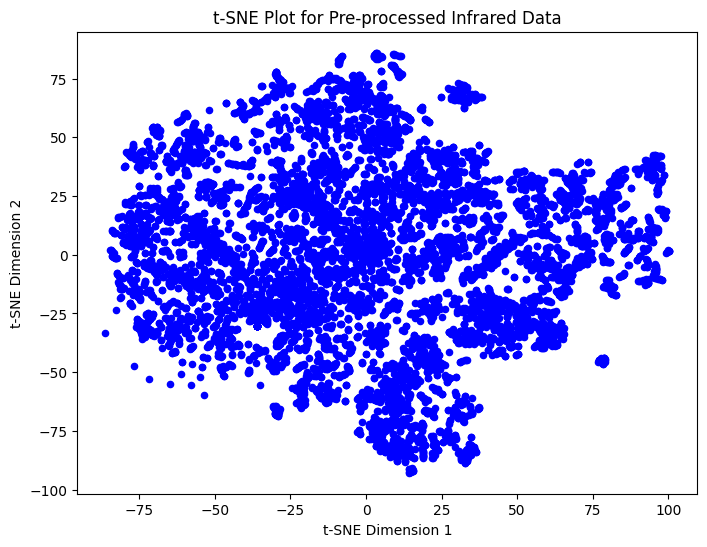

In [988]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = prepped_infrared_df.to_numpy()

# t-SNE Plot for the Pre-processed Infrared Data

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Pre-processed Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [989]:
# 10 clusters on the Pre-processed Infrared Data

clusters = kmeansfunc(prepped_infrared_df, 10)
clusters = clusters.to_numpy().ravel()
db_score(prepped_infrared_df, clusters)
calinski_score(prepped_infrared_df, clusters)
accuracy_metric(prepped_infrared_df, y_train, clusters)
silhouetteScore(prepped_infrared_df,clusters)

Inertia:  16758303468.03527
Davies-Bouldin Score: 2.1610167138320424
Calinski-Harabasz Score: 2041.730862207949
Accuracy: 0.4694047743146044
Silhouette Score: 0.5041986688186679


0.5041986688186679

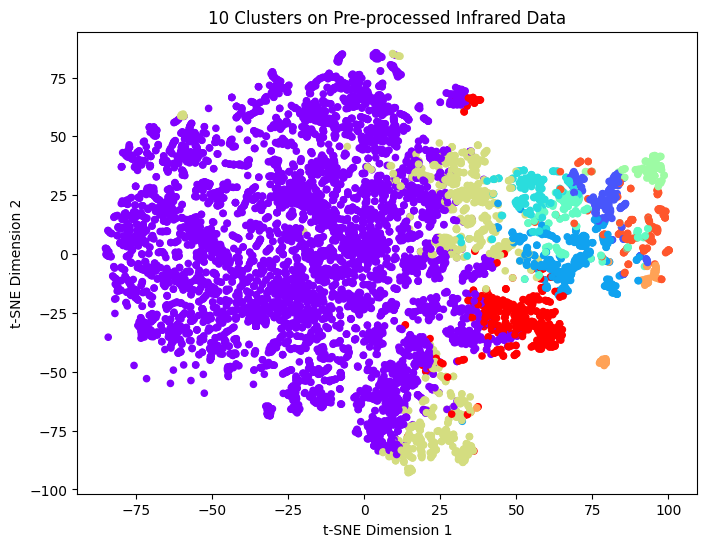

In [990]:
infrared_data = prepped_infrared_df.to_numpy()

# t-SNE Plot for the above clustering

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('10 Clusters on Pre-processed Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [991]:
# 2 clusters on the Pre-processed Infrared Data

clusters = kmeansfunc(prepped_infrared_df, 2)
clusters = clusters.to_numpy().ravel()
db_score(prepped_infrared_df, clusters)
calinski_score(prepped_infrared_df, clusters)
accuracy_metric(prepped_infrared_df, y_train, clusters)
silhouetteScore(prepped_infrared_df,clusters)

Inertia:  26778047697.812164
Davies-Bouldin Score: 0.9552133638986922
Calinski-Harabasz Score: 7920.712473636974
Accuracy: 0.6600646304597102
Silhouette Score: 0.7033537860848569


0.7033537860848569

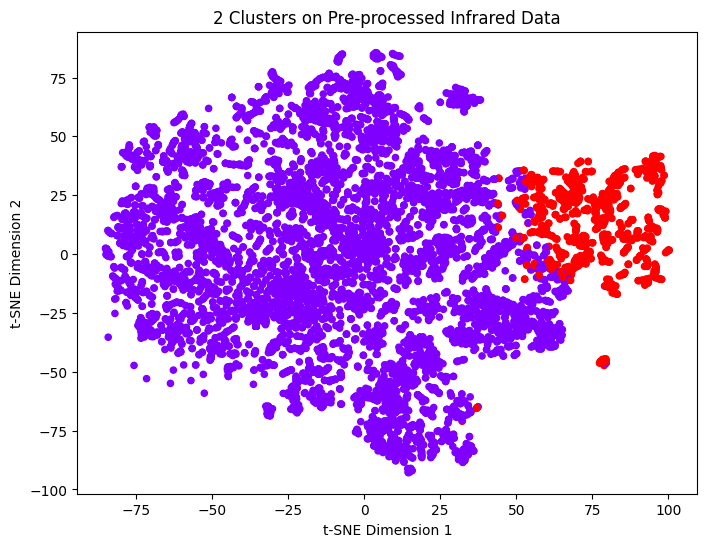

In [992]:
infrared_data = prepped_infrared_df.to_numpy()

# t-SNE Plot for the above clustering.

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('2 Clusters on Pre-processed Infrared Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [993]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Function to perform PCA on a given dataset with a specified number of components.

def PCAOnData(features,components):
    pca = PCA(n_components=components)
    X_pca = pca.fit_transform(features)
    df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
    return df_pca

In [994]:
# 10 clusters on 50 component PCA preprocessed infrared data.

df_pca_50 = PCAOnData(prepped_infrared_df, 50)
clusters_pca50 = kmeansfunc(df_pca_50, 10)
clusters_pca50 = clusters_pca50.to_numpy().ravel()
db_score(df_pca_50, clusters_pca50)
calinski_score(df_pca_50, clusters_pca50)
accuracy_metric(df_pca_50, y_train, clusters_pca50)
silhouetteScore(df_pca_50, clusters_pca50)

Inertia:  11787472114.59153
Davies-Bouldin Score: 1.7448818381268438
Calinski-Harabasz Score: 2913.260778522338
Accuracy: 0.47211508391535495
Silhouette Score: 0.5424919194616464


0.5424919194616464

In [995]:
# 2 clusters on 50 component PCA preprocessed infrared data.

df_pca_50 = PCAOnData(prepped_infrared_df, 50)
clusters_pca50 = kmeansfunc(df_pca_50, 2)
clusters_pca50 = clusters_pca50.to_numpy().ravel()
db_score(df_pca_50, clusters_pca50)
calinski_score(df_pca_50, clusters_pca50)
accuracy_metric(df_pca_50, y_train, clusters_pca50)
silhouetteScore(df_pca_50, clusters_pca50)

Inertia:  21924009490.410355
Davies-Bouldin Score: 0.8640574737090189
Calinski-Harabasz Score: 9674.133114961827
Accuracy: 0.6600646304597102
Silhouette Score: 0.7293601640720143


0.7293601640720143

In [996]:
image_df = prepped_infrared_df.copy()

In [997]:
# Create a list to store the Fourier Transformed images
fourier_transformed_images = []

# Iterate through each row (image) in the DataFrame
for index, row in image_df.iterrows():
    # Convert the row (image) to a NumPy array
    image = row.values.reshape(48, 48)

    # Apply DFT to the image
    dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

    # Shift the zero frequency components to the center
    dft_shifted = np.fft.fftshift(dft)

    # Calculate the magnitude spectrum
    magnitude_spectrum = cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])

    # Flatten the magnitude spectrum to 1D
    flattened_magnitude_spectrum = magnitude_spectrum.flatten()

    # Append the flattened magnitude spectrum to the list
    fourier_transformed_images.append(flattened_magnitude_spectrum)

fourier_df = pd.DataFrame(fourier_transformed_images)

In [998]:
image_df = prepped_infrared_df.copy()

In [999]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data using MinMaxScaler.

scaler = MinMaxScaler()
scaled_data_normalized = scaler.fit_transform(image_df)

In [1000]:
# 10 clusters on the scaled data.

clusters = kmeansfunc(scaled_data_normalized, 10)
clusters = clusters.to_numpy().ravel()
db_score(scaled_data_normalized, clusters)
calinski_score(scaled_data_normalized, clusters)
accuracy_metric(scaled_data_normalized, y_train, clusters)
silhouetteScore(scaled_data_normalized, clusters)

Inertia:  327989.06557153875
Davies-Bouldin Score: 2.1224684459426264
Calinski-Harabasz Score: 1863.7683031502645
Accuracy: 0.3199207755655165
Silhouette Score: 0.3726768395125648


0.3726768395125648

In [1001]:
prepped_infrared_df.shape

(9593, 2304)

In [1002]:
# Function to apply a median filter to an input image
def apply_median_filter(image, kernel_size=37):
    # Apply a median filter to the image with the specified kernel size.
    return cv2.medianBlur(image, kernel_size)

# Function to apply Gaussian blur to an input image using OpenCV
def apply_gaussian_blur_cv(image, kernel_size=(15, 15)):
    # Apply Gaussian blur to the image with the specified kernel size.
    return cv2.GaussianBlur(image, kernel_size, 0)

# Function to apply bilateral filter to an input image
def apply_bilateral_filter(image, diameter=25, sigma_color=75, sigma_space=75):
    # Apply a bilateral filter to the image with the specified parameters (diameter, sigma_color, and sigma_space).
    return cv2.bilateralFilter(image, diameter, sigma_color, sigma_space)

In [1003]:
image_df = prepped_infrared_df.copy()
infrared_prep2 = []

# Apply the above functions to each image in the pre-processed pseudo-infrared DataFrame.

for index, row in image_df.iterrows():
    image_data = row.values
    median_image = apply_median_filter(image_data)
    gaussian_image = apply_gaussian_blur_cv(median_image)
    median_image = apply_median_filter(gaussian_image)
    gaussian_image = apply_gaussian_blur_cv(median_image)
    infrared_prep2.append(gaussian_image.flatten())

prepped_infrared_df2 = pd.DataFrame(infrared_prep2)
prepped_infrared_df2.shape

(9593, 2304)

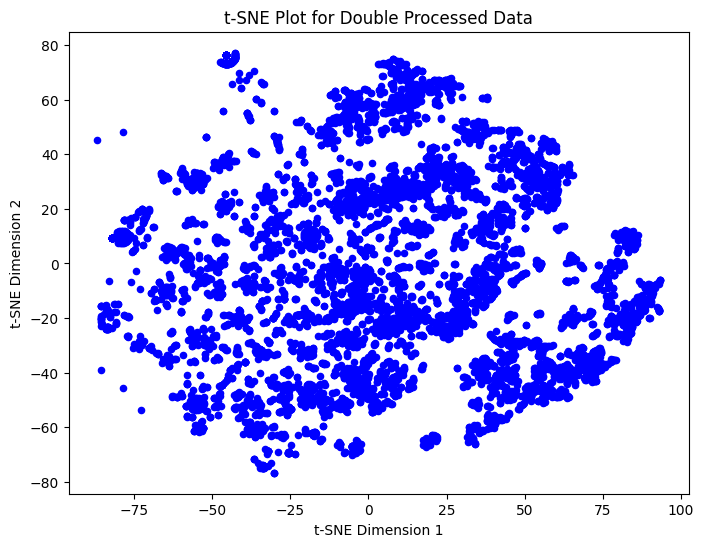

In [1004]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = prepped_infrared_df2.to_numpy()

# t-SNE Plot for the double-processed pseudo-infrared data frame.

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Double Processed Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [1005]:
# 10 clusters on the double-processed pseudo-infrared data frame.

clusters = kmeansfunc(prepped_infrared_df2, 10)
clusters = clusters.to_numpy().ravel()
db_score(prepped_infrared_df2, clusters)
calinski_score(prepped_infrared_df2, clusters)
accuracy_metric(prepped_infrared_df2, y_train, clusters)
silhouetteScore(prepped_infrared_df2, clusters)

Inertia:  3797272064.508808
Davies-Bouldin Score: 1.3650384748399522
Calinski-Harabasz Score: 6878.575689738602
Accuracy: 0.6550609819660169
Silhouette Score: 0.7680452850582176


0.7680452850582176

In [1006]:
# 2 clusters on the double-processed pseudo-infrared data frame.

clusters = kmeansfunc(prepped_infrared_df2, 2)
clusters = clusters.to_numpy().ravel()
db_score(prepped_infrared_df2, clusters)
calinski_score(prepped_infrared_df2, clusters)
accuracy_metric(prepped_infrared_df2, y_train, clusters)
silhouetteScore(prepped_infrared_df2, clusters)

Inertia:  11172100781.2452
Davies-Bouldin Score: 0.6848884133348282
Calinski-Harabasz Score: 14727.997624261909
Accuracy: 0.744396956113833
Silhouette Score: 0.8695890578167562


0.8695890578167562

In [1007]:
# 50 component PCA on the double-processed pseudo-infrared data frame.

pca_50 = PCAOnData(prepped_infrared_df2, 50)

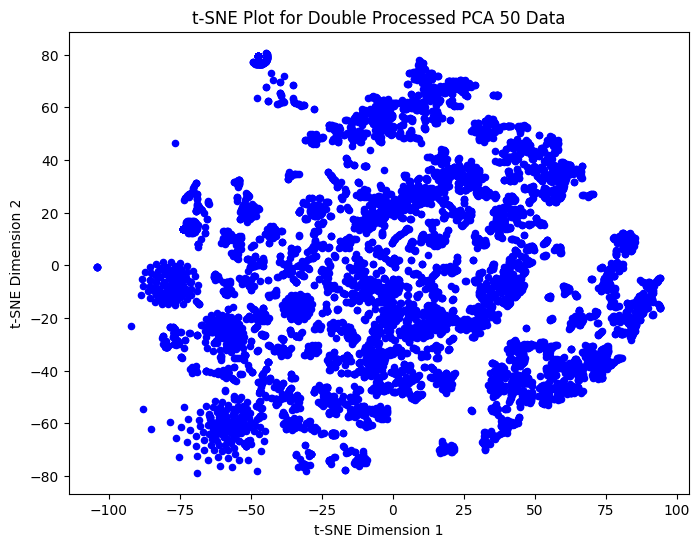

In [1008]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = infrared_df_org.to_numpy()

# t-SNE Plot for the 50 compnent PCA double-processed pseudo-infrared data frame.

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(pca_50)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Double Processed PCA 50 Data')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [1009]:
# 10 clusters on the 50 component PCA double-processed pseudo-infrared data frame.

clusters = kmeansfunc(pca_50, 10)
clusters = clusters.to_numpy().ravel()
db_score(pca_50, clusters)
calinski_score(pca_50, clusters)
accuracy_metric(pca_50, y_train, clusters)
silhouetteScore(pca_50, clusters)

Inertia:  3566565532.065587
Davies-Bouldin Score: 1.3099640725038526
Calinski-Harabasz Score: 7326.59500747809
Accuracy: 0.6553737099968727
Silhouette Score: 0.7719946539344407


0.7719946539344407

In [1010]:
# 2 clusters on the 50 component PCA double-processed pseudo-infrared data frame.

clusters = kmeansfunc(pca_50, 2)
clusters = clusters.to_numpy().ravel()
db_score(pca_50, clusters)
calinski_score(pca_50, clusters)
accuracy_metric(pca_50, y_train, clusters)
silhouetteScore(pca_50, clusters)

Inertia:  10951719162.939302
Davies-Bouldin Score: 0.677644431148612
Calinski-Harabasz Score: 15024.339886018277
Accuracy: 0.744396956113833
Silhouette Score: 0.8711228488226394


0.8711228488226394

In [1011]:
# 5 clusters on the 50 component PCA double-processed pseudo-infrared data frame.

clusters = kmeansfunc(pca_50, 5)
clusters = clusters.to_numpy().ravel()
db_score(pca_50, clusters)
calinski_score(pca_50, clusters)
accuracy_metric(pca_50, y_train, clusters)
silhouetteScore(pca_50, clusters)

Inertia:  5029328659.611444
Davies-Bouldin Score: 1.1882399719838095
Calinski-Harabasz Score: 10999.219698415995
Accuracy: 0.6668404044615865
Silhouette Score: 0.7906929372309283


0.7906929372309283

In [1012]:
# PCA on the double-processed pseudo-infrared data frame with 3 components.

pca_3 = PCAOnData(prepped_infrared_df2,3)

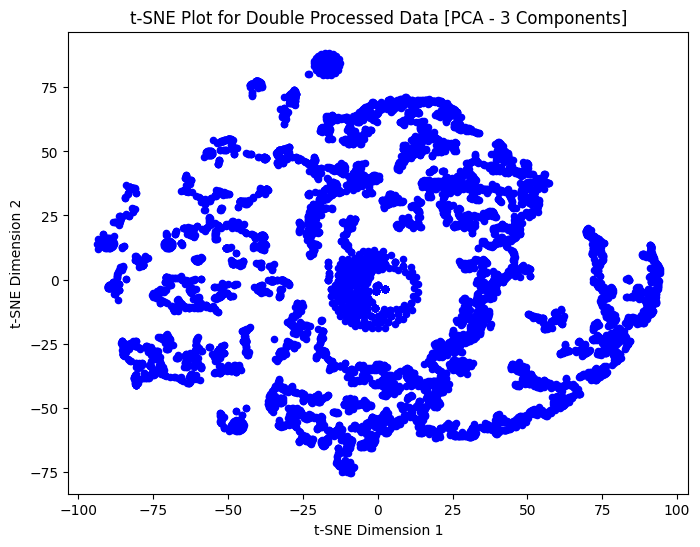

In [1013]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = pca_3.to_numpy()

# t-SNE Plot for the 3 component PCA double-processed pseudo-infrared data frame.

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Double Processed Data [PCA - 3 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [1014]:
from sklearn.cluster import KMeans

# Computing an elbow plot to see if the optimal number of clusters changes.

wcss = [] 
for i in range(1, 16): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 19)
    kmeans.fit(pca_3) 
    wcss.append(kmeans.inertia_)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

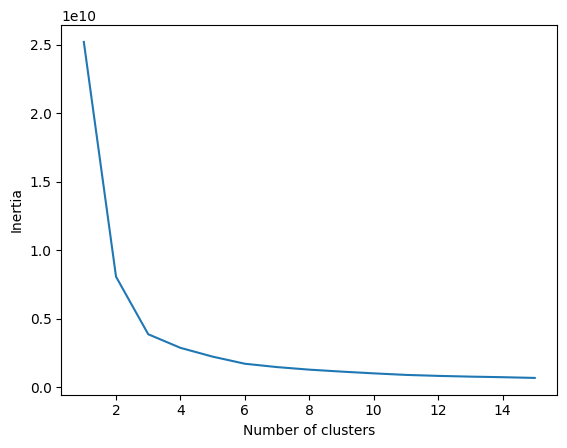

In [1015]:
plt.plot(range(1, 16), wcss)
plt.xlabel('Number of clusters')
plt.annotate('Elbow',
             xy=(4, inertia[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.ylabel('Inertia') 
plt.show()

In [1016]:
# 10 clusters on the 3 component PCA double-processed pseudo-infrared data frame.

clusters = kmeansfunc(pca_3, 10)
clusters = clusters.to_numpy().ravel()
db_score(pca_3, clusters)
calinski_score(pca_3, clusters)
accuracy_metric(pca_3, y_train, clusters)
silhouetteScore(pca_3, clusters)

Inertia:  1003073448.8734038
Davies-Bouldin Score: 0.7449347215254801
Calinski-Harabasz Score: 25698.9610391241
Accuracy: 0.6496403627645158
Silhouette Score: 0.8059037212638843


0.8059037212638843

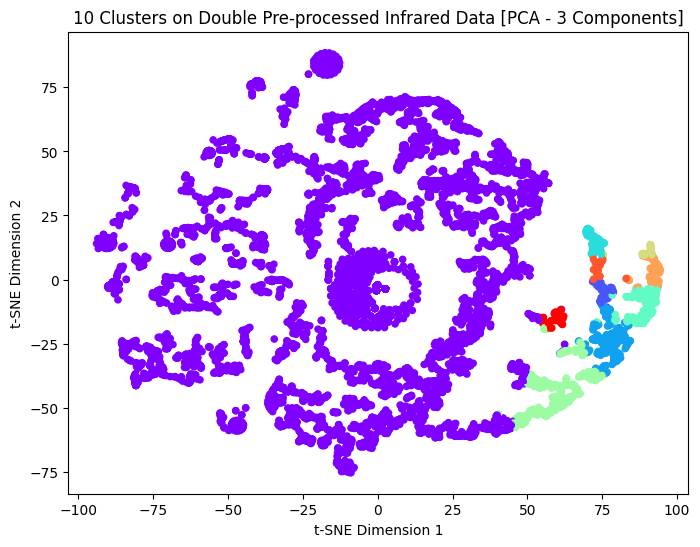

In [1017]:
infrared_data = pca_3.to_numpy()

# t-SNE Plot for the above clustering.

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('10 Clusters on Double Pre-processed Infrared Data [PCA - 3 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [1018]:
# 2 clusters on the 3 component PCA double-processed pseudo-infrared data frame.

clusters = kmeansfunc(pca_3, 2)
clusters = clusters.to_numpy().ravel()
db_score(pca_3, clusters)
calinski_score(pca_3, clusters)
accuracy_metric(pca_3, y_train, clusters)
silhouetteScore(pca_3, clusters)

Inertia:  8064329532.388697
Davies-Bouldin Score: 0.5666139536253667
Calinski-Harabasz Score: 20394.836190911687
Accuracy: 0.744396956113833
Silhouette Score: 0.8916198226790853


0.8916198226790853

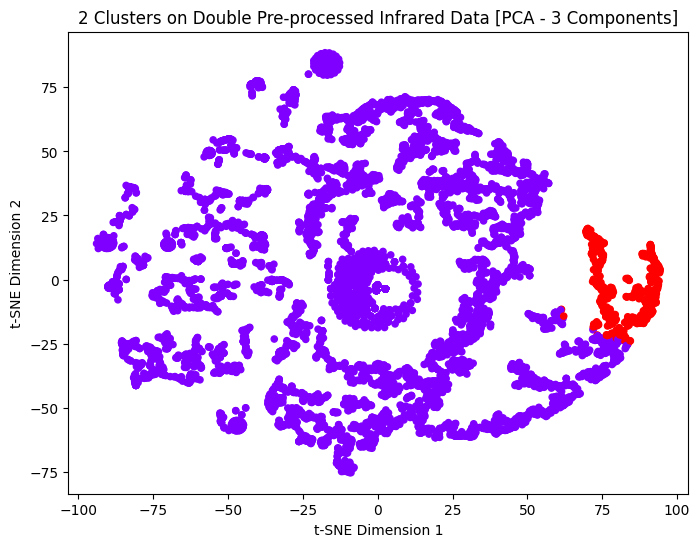

In [1019]:
infrared_data = pca_3.to_numpy()

# t-SNE Plot for the above clustering.

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('2 Clusters on Double Pre-processed Infrared Data [PCA - 3 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [1020]:
# 5 clusters on the 3 component PCA double-processed pseudo-infrared data frame.

clusters = kmeansfunc(pca_3, 5)
clusters = clusters.to_numpy().ravel()
db_score(pca_3, clusters)
calinski_score(pca_3, clusters)
accuracy_metric(pca_3, y_train, clusters)
silhouetteScore(pca_3, clusters)

Inertia:  2224059697.2181644
Davies-Bouldin Score: 0.7505944558589244
Calinski-Harabasz Score: 24776.714285174236
Accuracy: 0.6674658605232983
Silhouette Score: 0.8309704012167032


0.8309704012167032

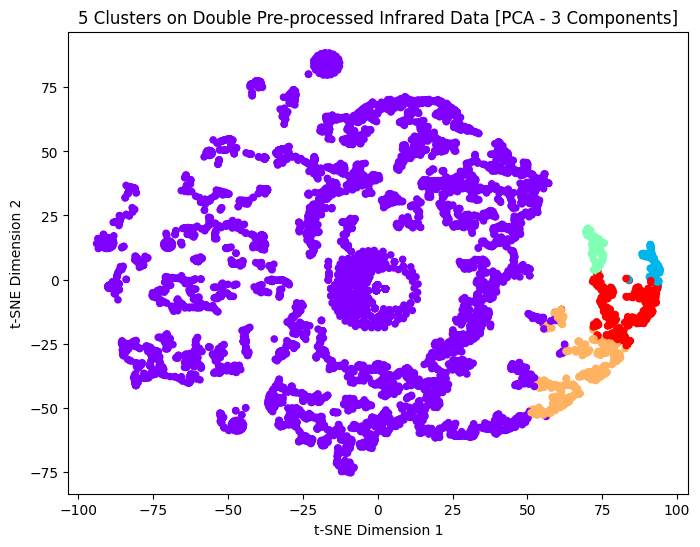

In [1021]:
infrared_data = pca_3.to_numpy()

# t-SNE Plot for the above clustering.

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters, cmap='rainbow', s=20)
plt.title('5 Clusters on Double Pre-processed Infrared Data [PCA - 3 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [1022]:
import umap.umap_ as umap

# Copy the data from 'prepped_infrared_df2' into 'data_df'
data_df = prepped_infrared_df2.copy()

# Create a UMAP (Uniform Manifold Approximation and Projection) model with 2 components
umap_model = umap.UMAP(n_components=2)

# Apply UMAP dimensionality reduction to the data, resulting in 'reduced_data'
reduced_data = umap_model.fit_transform(data_df)

In [1023]:
# 10 clusters on the UMAP reduced data.

clusters = kmeansfunc(reduced_data, 10)
clusters = clusters.to_numpy().ravel()
db_score(reduced_data, clusters)
calinski_score(reduced_data, clusters)
accuracy_metric(reduced_data, y_train, clusters)
silhouetteScore(reduced_data, clusters)

Inertia:  56562.4921875
Davies-Bouldin Score: 0.6252589434423672
Calinski-Harabasz Score: 14835.215722066792
Accuracy: 0.18482226623579692
Silhouette Score: 0.53022784


0.53022784

In [1024]:
from sklearn.random_projection import GaussianRandomProjection

# Copy the data from 'prepped_infrared_df2' into 'data_df'
data_df = prepped_infrared_df2.copy()

# Create a GaussianRandomProjection model with 1000 components
rp = GaussianRandomProjection(n_components=1000)

# Apply Gaussian random projection to the data, resulting in 'reduced_data'
reduced_data = rp.fit_transform(data_df)

In [1025]:
# 10 clusters on the Gaussian Random Projection reduced data.

clusters = kmeansfunc(reduced_data, 10)
clusters = clusters.to_numpy().ravel()
db_score(reduced_data, clusters)
calinski_score(reduced_data, clusters)
accuracy_metric(reduced_data, y_train, clusters)
silhouetteScore(reduced_data, clusters)

Inertia:  3816708177.910906
Davies-Bouldin Score: 1.4811843215984328
Calinski-Harabasz Score: 6696.21115890966
Accuracy: 0.6391118523923695
Silhouette Score: 0.7316054768476383


0.7316054768476383

In [1026]:
from sklearn.manifold import Isomap

# Copy the data from 'prepped_infrared_df2' into 'data_df'
data_df = prepped_infrared_df2.copy()

# Create an Isomap (Isometric Mapping) model with 50 components
isomap = Isomap(n_components=50)

# Apply Isomap dimensionality reduction to the data, resulting in 'reduced_data'
reduced_data = isomap.fit_transform(data_df)

/opt/homebrew/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/homebrew/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [1027]:
iso_df = prepped_infrared_df2.copy()

In [1028]:
# Repeat the same process with 2 components instead this time.

isomap = Isomap(n_components=2)
iso_data = isomap.fit_transform(iso_df)

/opt/homebrew/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/homebrew/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [1029]:
# 10 clusters on the Isomap reduced data.

clusters_10 = kmeansfunc(iso_data, 10)
clusters_10 = clusters_10.to_numpy().ravel()
db_score(iso_data, clusters_10)
calinski_score(iso_data, clusters_10)
accuracy_metric(iso_data, y_train, clusters_10)
silhouetteScore(iso_data, clusters_10)

Inertia:  5945987093.679824
Davies-Bouldin Score: 0.7589924808997026
Calinski-Harabasz Score: 22762.873358971694
Accuracy: 0.6789325549880121
Silhouette Score: 0.847917473886052


0.847917473886052

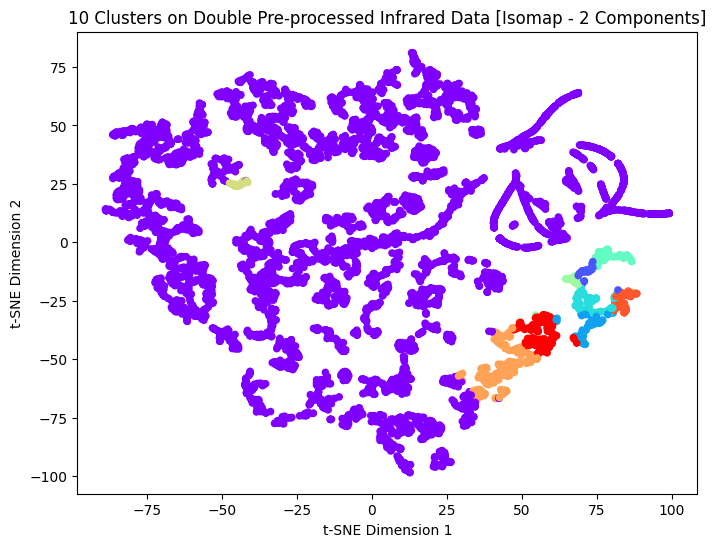

In [1030]:
infrared_data = iso_data.copy()

# t-SNE Plot for the above clustering.

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_10, cmap='rainbow', s=20)
plt.title('10 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [1031]:
# 2 clusters on the Isomap reduced data.

clusters_2 = kmeansfunc(iso_data, 2)
clusters_2 = clusters_2.to_numpy().ravel()
db_score(iso_data, clusters_2)
calinski_score(iso_data, clusters_2)
accuracy_metric(iso_data, y_train, clusters_2)
silhouetteScore(iso_data, clusters_2)

Inertia:  44583064876.33251
Davies-Bouldin Score: 0.5549164990744831
Calinski-Harabasz Score: 19033.650089295126
Accuracy: 0.7732721776295215
Silhouette Score: 0.9109522225806552


0.9109522225806552

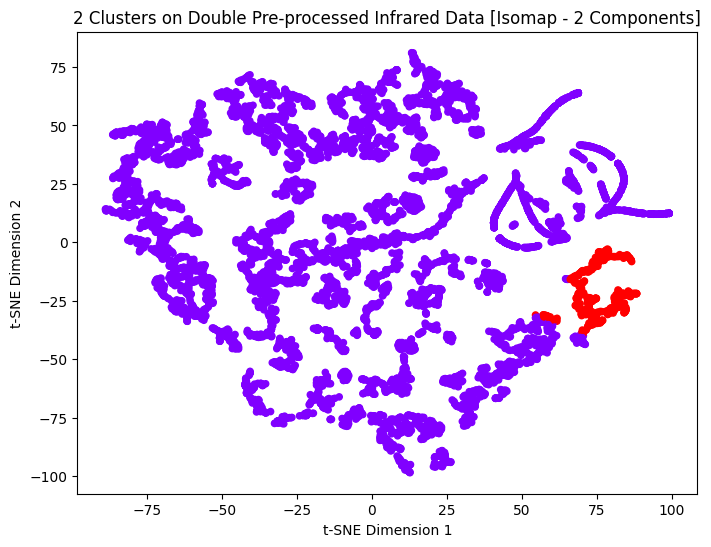

In [1032]:
infrared_data = iso_data.copy()

# t-SNE Plot for the above clustering.

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_2, cmap='rainbow', s=20)
plt.title('2 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [1033]:
# 5 clusters on the Isomap reduced data.

clusters_5 = kmeansfunc(iso_data, 5)
clusters_5 = clusters_5.to_numpy().ravel()
db_score(iso_data, clusters_5)
calinski_score(iso_data, clusters_5)
accuracy_metric(iso_data, y_train, clusters_5)
silhouetteScore(iso_data, clusters_5)

Inertia:  12390569773.288023
Davies-Bouldin Score: 0.6254195921201624
Calinski-Harabasz Score: 23343.85527408699
Accuracy: 0.6994683623475451
Silhouette Score: 0.8791488176592896


0.8791488176592896

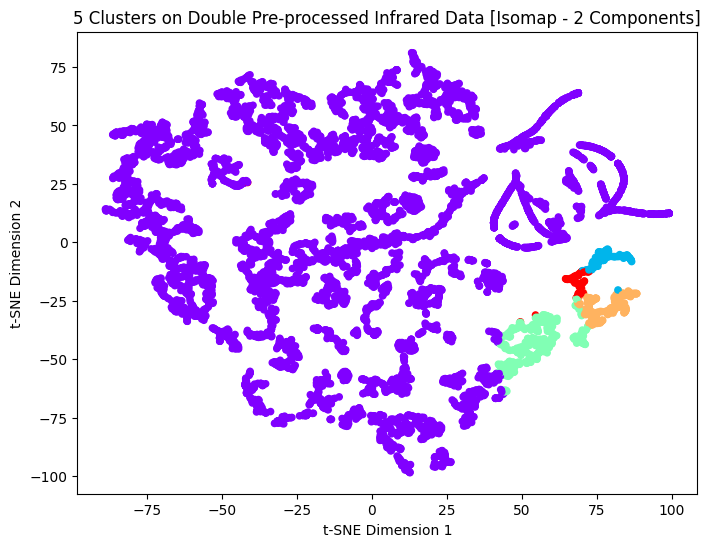

In [1034]:
infrared_data = iso_data.copy()

# t-SNE Plot for the above clustering.

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_5, cmap='rainbow', s=20)
plt.title('5 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

<div style="text-align: center;">

## Highest silhouette scores thus far:

#### 10 clusters - 0.9750181505494335 (Initial score - 0.14337657005172605)
#### 8 clusters - 0.9743239952747715 (Initial score - 0.15572181678470226)
#### 6 clusters - 0.9731338122205031 (Initial score - 0.20639571486279004)
#### 4 clusters - 0.9903732291634489 (Initial score - 0.3119771748068869)
#### 2 clusters - 0.845465747890616 (Initial score - 0.3568434794605163)

In [1035]:
# Define a function to intensify image data based on percentiles
def lp_intensify(arr, lower_percentile, upper_percentile):
    # Calculate the lower and upper intensity limits based on percentiles
    lower_limit = np.percentile(arr, lower_percentile)
    upper_limit = np.percentile(arr, upper_percentile)
    
    # Set values in 'arr' below the lower limit to 0 and values above the upper limit to 255
    arr[arr < lower_limit] = 0
    arr[arr > upper_limit] = 255
    
    return arr

# Copy data from 'iso_data' into 'data'
data = iso_data.copy()

# Intensify the data using the 'lp_intensify' function with lower and upper percentiles of 87 and 90
lower_frequency_data = lp_intensify(data, 87, 90)

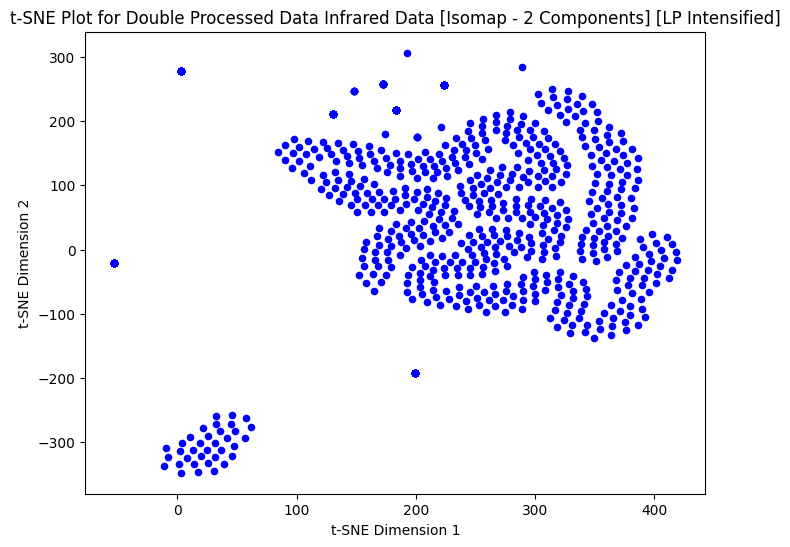

In [1036]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

infrared_data = lower_frequency_data.copy()

# t-SNE Plot for the Double Processed Data Infrared Data [Isomap - 2 Components] with the lower pixels intensified.

tsne = TSNE(n_components=2, perplexity=30, random_state=42)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c='b', marker='o', s=20)
plt.title('t-SNE Plot for Double Processed Data Infrared Data [Isomap - 2 Components] [LP Intensified]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [1037]:
silhouette_scores = []
inertia = []
cluster_range = range(2, 16)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=19)
    graph_clusters = kmeans.fit_predict(lower_frequency_data)
    graph_clusters = pd.DataFrame(graph_clusters)
    inertia.append(kmeans.inertia_)
    score = silhouetteScore(lower_frequency_data, graph_clusters)
    silhouette_scores.append(score)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.8454657478906161


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9559656747743793


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9903732291634495


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9717017101442607


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9731338122205023


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9736928880391723


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9743239952747696


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9742042201062521


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9750181505494315


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9736149826639658


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9727651975086116


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9732819224177061


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9733983070155647


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.9726900107003144


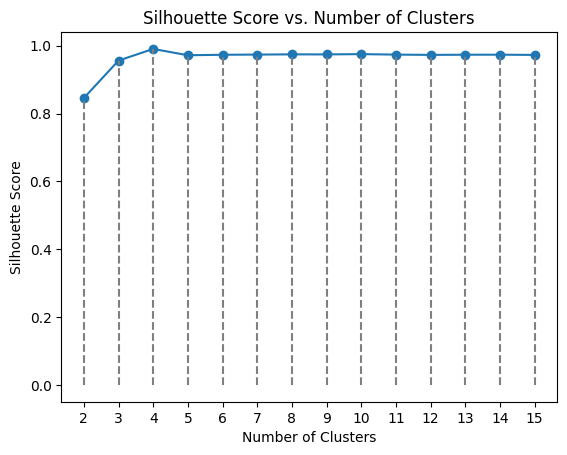

In [1038]:
# Plotting the silhouette scores against the number of clusters.

plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xticks(cluster_range)

for i in cluster_range:
    index = i - 2
    plt.plot([cluster_range[index], cluster_range[index]], [0, silhouette_scores[index]], linestyle='--', color='gray')


plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

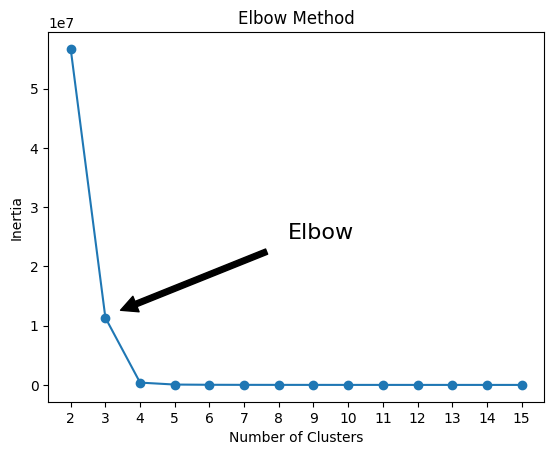

In [1039]:
plt.plot(cluster_range, inertia, marker='o')
plt.xticks(cluster_range)

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.annotate('Elbow',
             xy=(2.9, inertia[1]),
             xytext=(0.45, 0.45),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.title('Elbow Method')
plt.show()

In [1040]:
# 2 clusters on the data with the lower pixels intensified.

clusters_2 = kmeansfunc(lower_frequency_data, 2)
clusters_2 = clusters_2.to_numpy().ravel()
db_score(lower_frequency_data, clusters_2)
calinski_score(lower_frequency_data, clusters_2)
accuracy_metric(lower_frequency_data, y_train, clusters_2)
silhouetteScore(lower_frequency_data, clusters_2)

Inertia:  56696803.32663621
Davies-Bouldin Score: 0.4055320250189409
Calinski-Harabasz Score: 15514.451471684208
Accuracy: 0.4485562389242156
Silhouette Score: 0.8454657478906161


0.8454657478906161

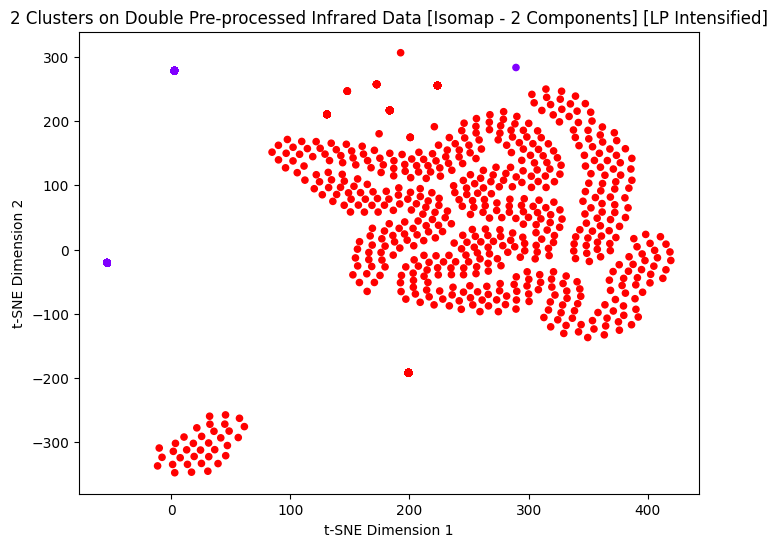

In [1041]:
infrared_data = lower_frequency_data.copy()

# t-SNE Plot for the above clustering.

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_2, cmap='rainbow', s=20)
plt.title('2 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components] [LP Intensified]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [1042]:
# 4 clusters on the data with the lower pixels intensified.

clusters_4 = kmeansfunc(lower_frequency_data, 4)
clusters_4 = clusters_4.to_numpy().ravel()
db_score(lower_frequency_data, clusters_4)
calinski_score(lower_frequency_data, clusters_4)
accuracy_metric(lower_frequency_data, y_train, clusters_4)
silhouetteScore(lower_frequency_data, clusters_4)

Inertia:  392728.4241888606
Davies-Bouldin Score: 0.056269597107909686
Calinski-Harabasz Score: 1204679.9302376544
Accuracy: 0.34202022307932867
Silhouette Score: 0.9903732291634495


0.9903732291634495

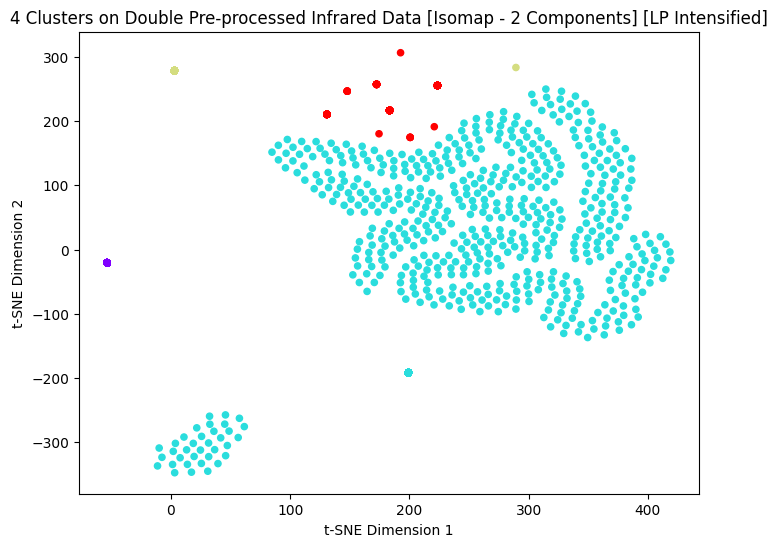

In [1043]:
infrared_data = lower_frequency_data.copy()

# t-SNE Plot for the above clustering.

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_4, cmap='rainbow', s=20)
plt.title('4 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components] [LP Intensified]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [1044]:
# 6 clusters on the data with the lower pixels intensified.

clusters_6 = kmeansfunc(lower_frequency_data, 6)
clusters_6 = clusters_6.to_numpy().ravel()
db_score(lower_frequency_data, clusters_6)
calinski_score(lower_frequency_data, clusters_6)
accuracy_metric(lower_frequency_data, y_train, clusters_6)
silhouetteScore(lower_frequency_data, clusters_6)

Inertia:  24317.701531932227
Davies-Bouldin Score: 0.23335995108722515
Calinski-Harabasz Score: 11701085.033894304
Accuracy: 0.35661419785260084
Silhouette Score: 0.9731338122205023


0.9731338122205023

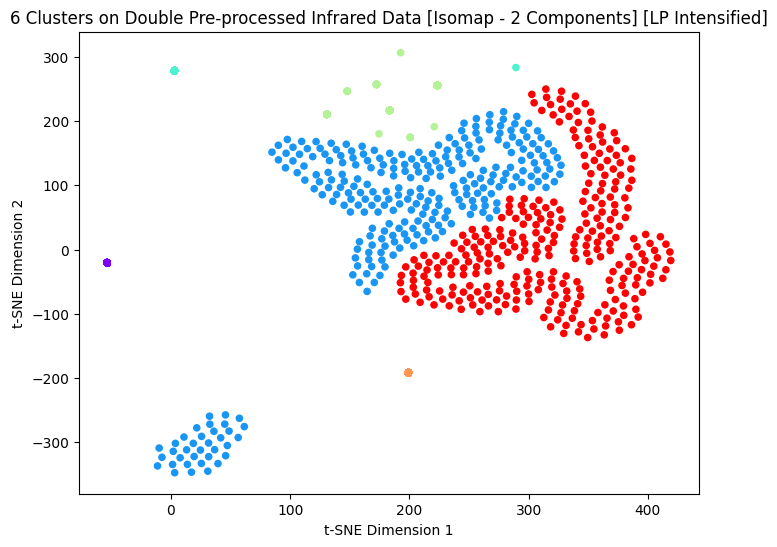

In [1045]:
infrared_data = lower_frequency_data.copy()

# t-SNE Plot for the above clustering.

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_6, cmap='rainbow', s=20)
plt.title('6 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components] [LP Intensified]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [1046]:
# 8 clusters on the data with the lower pixels intensified.

clusters_8 = kmeansfunc(lower_frequency_data, 8)
clusters_8 = clusters_8.to_numpy().ravel()
db_score(lower_frequency_data, clusters_8)
calinski_score(lower_frequency_data, clusters_8)
accuracy_metric(lower_frequency_data, y_train, clusters_8)
silhouetteScore(lower_frequency_data, clusters_8)

Inertia:  8454.905735559303
Davies-Bouldin Score: 0.27092186290126363
Calinski-Harabasz Score: 24055757.462211482
Accuracy: 0.48066298342541436
Silhouette Score: 0.9743239952747696


0.9743239952747696

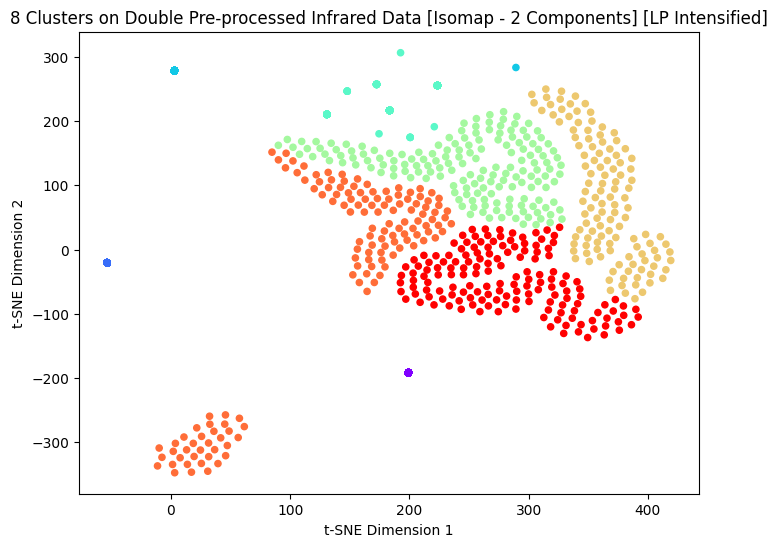

In [1047]:
infrared_data = lower_frequency_data.copy()

# t-SNE Plot for the above clustering.

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_8, cmap='rainbow', s=20)
plt.title('8 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components] [LP Intensified]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

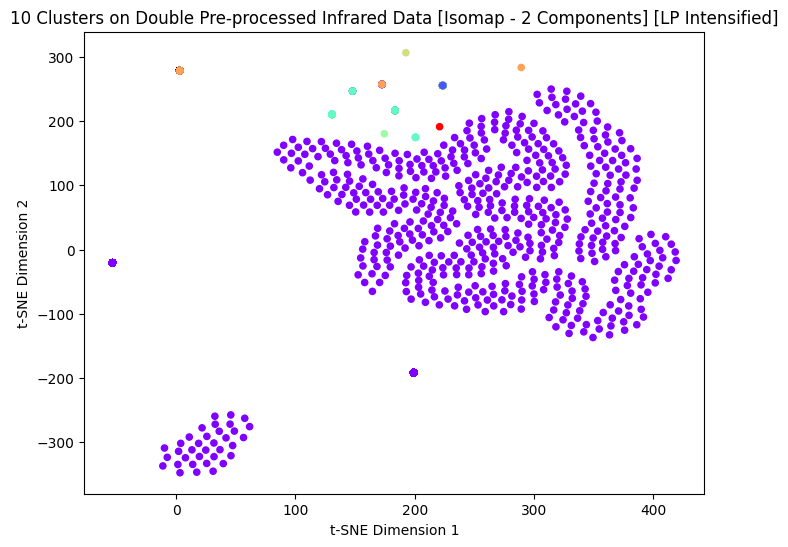

In [1048]:
infrared_data = lower_frequency_data.copy()

# t-SNE Plot for the above clustering.

tsne = TSNE(n_components=2, perplexity=30, random_state=19)

infrared_embedded = tsne.fit_transform(infrared_data)

plt.figure(figsize=(8, 6))
plt.scatter(infrared_embedded[:, 0], infrared_embedded[:, 1], c=clusters_10, cmap='rainbow', s=20)
plt.title('10 Clusters on Double Pre-processed Infrared Data [Isomap - 2 Components] [LP Intensified]')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

<div style="text-align: center;">

## Highest Accuracies

#### 2 clusters [Iso map reduced data (2 components)] - 0.7732721776295215
#### 2 clusters [PCA reduced data (3 components)] - 0.744396956113833
#### 2 clusters [Double preprocessed data]- 0.744396956113833
#### 10 clusters [Iso map reduced data (50 components)] - 0.680913165850099
#### 2 clusters - 0.845465747890616 (Initial score - 0.3568434794605163)
#### 10 clusters [Iso map reduced data (2 components)] - 0.6789325549880121

In [1049]:
# 2 clusters on the Iso map reduced data (2 components).

clusters_2 = kmeansfunc(iso_data, 2, False)
clusters_2 = clusters_2.to_numpy().ravel()
accuracy_metric(iso_data, y_train, clusters_2)

Accuracy: 0.7732721776295215


0.7732721776295215

In [1050]:
# 2 clusters on the PCA reduced data (3 components).

clusters = kmeansfunc(pca_3, 2, False)
clusters = clusters.to_numpy().ravel()
accuracy_metric(pca_3, y_train, clusters)

Accuracy: 0.744396956113833


0.744396956113833

In [1051]:
# 2 clusters on the PCA reduced data (50 components).

clusters = kmeansfunc(pca_50, 2, False)
clusters = clusters.to_numpy().ravel()
accuracy_metric(pca_50, y_train, clusters)

Accuracy: 0.744396956113833


0.744396956113833

In [1052]:
# 2 clusters on the double processed data.

clusters = kmeansfunc(prepped_infrared_df2, 2, False)
clusters = clusters.to_numpy().ravel()
accuracy_metric(prepped_infrared_df2, y_train, clusters)

Accuracy: 0.744396956113833


0.744396956113833

In [1053]:
# 10 clusters on the isomap reduced data (50 components).

clusters = kmeansfunc(reduced_data, 10, False)
clusters = clusters.to_numpy().ravel()
accuracy_metric(reduced_data, y_train, clusters)

Accuracy: 0.680913165850099


0.680913165850099

In [1054]:
# 10 clusters on the Isomap reduced data.

clusters_10 = kmeansfunc(iso_data, 10, False)
clusters_10 = clusters_10.to_numpy().ravel()
accuracy_metric(iso_data, y_train, clusters_10)

Accuracy: 0.6789325549880121


0.6789325549880121

<div style="text-align: center;">

## Lowest Davies-Bouldin Scores

#### 4 clusters [LP Intensified] - 0.056269597108027716
#### 6 clusters [LP Intensified] - 0.23335995108716268
#### 10 clusters [LP Intensified] - 0.2569405193650836
#### 8 clusters [LP Intensified] - 0.27092186290129194
#### 2 clusters [LP Intensified] - 0.40553202501894076

</div>

In [1055]:
# 4 clusters on the data with the lower pixels intensified.

clusters_4 = kmeansfunc(lower_frequency_data, 4, False)
clusters_4 = clusters_4.to_numpy().ravel()
db_score(lower_frequency_data, clusters_4)

Davies-Bouldin Score: 0.056269597107909686


0.056269597107909686

In [1056]:
# 6 clusters on the data with the lower pixels intensified.

clusters_6 = kmeansfunc(lower_frequency_data, 6, False)
clusters_6 = clusters_6.to_numpy().ravel()
db_score(lower_frequency_data, clusters_6)

Davies-Bouldin Score: 0.23335995108722515


0.23335995108722515

In [1057]:
# 10 clusters on the data with the lower pixels intensified.

clusters_10 = kmeansfunc(lower_frequency_data, 10, False)
clusters_10 = clusters_10.to_numpy().ravel()
db_score(lower_frequency_data, clusters_10)

Davies-Bouldin Score: 0.25694051936616474


0.25694051936616474

In [1058]:
# 8 clusters on the data with the lower pixels intensified.

clusters_8 = kmeansfunc(lower_frequency_data, 8, False)
clusters_8 = clusters_8.to_numpy().ravel()
db_score(lower_frequency_data, clusters_8)

Davies-Bouldin Score: 0.27092186290126363


0.27092186290126363

In [1059]:
# 2 clusters on the data with the lower pixels intensified.

clusters_2 = kmeansfunc(lower_frequency_data, 2, False)
clusters_2 = clusters_2.to_numpy().ravel()

db_score(lower_frequency_data, clusters_2)

Davies-Bouldin Score: 0.4055320250189409


0.4055320250189409

<div style="text-align: center;">

## Highest Calinski Score

#### 10 clusters [LP Intensified] - 35662113.191129856
#### 8 clusters [LP Intensified] - 24055757.46221078
#### 6 clusters [LP Intensified] - 11701085.033894196
#### 4 clusters [LP Intensified] - 1204679.930237563
#### 10 clusters [3 component PCA double-processed pseudo-infrared] - 25698.961011968197

In [1060]:
# 10 clusters on the data with the lower pixels intensified.

clusters_10 = kmeansfunc(lower_frequency_data, 10, False)
clusters_10 = clusters_10.to_numpy().ravel()
db_score(lower_frequency_data, clusters_10)
calinski_score(lower_frequency_data, clusters_10)
accuracy_metric(lower_frequency_data, y_train, clusters_10)
silhouetteScore(lower_frequency_data, clusters_10)

Davies-Bouldin Score: 0.25694051936616474
Calinski-Harabasz Score: 35662113.19113121
Accuracy: 0.48368602105702074
Silhouette Score: 0.9750181505494315


0.9750181505494315

In [1061]:
# 8 clusters on the data with the lower pixels intensified.

clusters_8 = kmeansfunc(lower_frequency_data, 8, False)
clusters_8 = clusters_8.to_numpy().ravel()
calinski_score(lower_frequency_data, clusters_8)

Calinski-Harabasz Score: 24055757.462211482


24055757.462211482

In [1062]:
# 6 clusters on the data with the lower pixels intensified.

clusters_6 = kmeansfunc(lower_frequency_data, 6, False)
clusters_6 = clusters_6.to_numpy().ravel()
calinski_score(lower_frequency_data, clusters_6)

Calinski-Harabasz Score: 11701085.033894304


11701085.033894304

In [1063]:
# 4 clusters on the data with the lower pixels intensified.

clusters_4 = kmeansfunc(lower_frequency_data, 4, False)
clusters_4 = clusters_4.to_numpy().ravel()
calinski_score(lower_frequency_data, clusters_4)

Calinski-Harabasz Score: 1204679.9302376544


1204679.9302376544

In [1064]:
# 10 clusters on the 3 component PCA double-processed pseudo-infrared data frame.

clusters = kmeansfunc(pca_3, 10, False)
clusters = clusters.to_numpy().ravel()
calinski_score(pca_3, clusters)

Calinski-Harabasz Score: 25698.9610391241


25698.9610391241